In [1]:
import tensorflow as tf
import numpy as np

# Hypothesis and Cost

$$ H(x) = Wx + b $$ 

$$ cost(W, b)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (H{ x }^{ i }-y^{ i } })^{ 2 } }  $$

# Simplifed hypothesis

$$ H(x) = Wx $$ 

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$



# Cost function
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

W = -1, cost(W) = 18.67
$$ cost(W)=\frac { 1 }{ 3 } ( (-1 * 1 - 1)^2 + (-1 * 2 - 2)^2 + (-1 * 3 - 3)^2) $$

W = 0, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (0 * 1 - 1)^2 + (0 * 2 - 2)^2 + (0 * 3 - 3)^2) $$

W = 1, cost(W) = 0
$$ cost(W)=\frac { 1 }{ 3 } ( (1 * 1 - 1)^2 + (1 * 2 - 2)^2 + (1 * 3 - 3)^2) $$

W = 2, cost(W) = 4.67
$$ cost(W)=\frac { 1 }{ 3 } ( (2 * 1 - 1)^2 + (2 * 2 - 2)^2 + (2 * 3 - 3)^2) $$


# Cost function in pure Python

In [4]:
import numpy as np

In [5]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

In [10]:
def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c = c + ( W* X[i] - Y[i])**2
    return c / len(X)

In [11]:
np.linspace(-3, 5, num=15)

array([-3.        , -2.42857143, -1.85714286, -1.28571429, -0.71428571,
       -0.14285714,  0.42857143,  1.        ,  1.57142857,  2.14285714,
        2.71428571,  3.28571429,  3.85714286,  4.42857143,  5.        ])

In [19]:
for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


# Cost function in Tensorflow

In [20]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

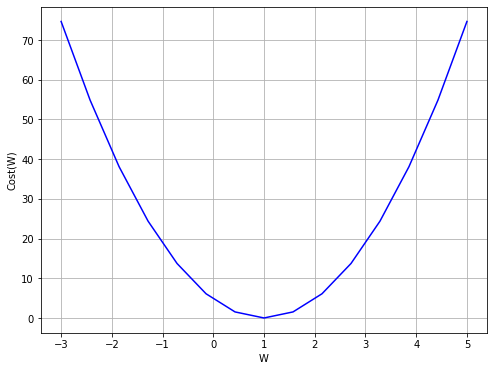

In [22]:
import matplotlib.pyplot as plt

plt.plot(W_values, cost_values, "b")
plt.grid()
plt.ylabel('Cost(W)')
plt.xlabel('W')

plt.show()

# Gradient descent algorithm
$$ W:=W-\alpha \frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ i }-y^{ i } })x^{ i } }  $$

In [26]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

In [29]:
W = tf.Variable(tf.random.normal((1,), -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |   853.8843 |  13.895580
   10 |   328.3180 |   8.996293
   20 |   126.2380 |   5.958342
   30 |    48.5384 |   4.074569
   40 |    18.6630 |   2.906479
   50 |     7.1759 |   2.182170
   60 |     2.7591 |   1.733040
   70 |     1.0609 |   1.454544
   80 |     0.4079 |   1.281853
   90 |     0.1568 |   1.174772
  100 |     0.0603 |   1.108372
  110 |     0.0232 |   1.067200
  120 |     0.0089 |   1.041669
  130 |     0.0034 |   1.025838
  140 |     0.0013 |   1.016022
  150 |     0.0005 |   1.009935
  160 |     0.0002 |   1.006160
  170 |     0.0001 |   1.003820
  180 |     0.0000 |   1.002369
  190 |     0.0000 |   1.001469
  200 |     0.0000 |   1.000911
  210 |     0.0000 |   1.000565
  220 |     0.0000 |   1.000350
  230 |     0.0000 |   1.000217
  240 |     0.0000 |   1.000134
  250 |     0.0000 |   1.000083
  260 |     0.0000 |   1.000052
  270 |     0.0000 |   1.000032
  280 |     0.0000 |   1.000020
  290 |     0.0000 |   1.000012


In [30]:
print(5.0 * W)
print(2.5 * W)

tf.Tensor([5.0000405], shape=(1,), dtype=float32)
tf.Tensor([2.5000203], shape=(1,), dtype=float32)


# Liner regression Summary

## 1) Hypothesis 

$$ H(x) = Wx + b $$

## 2) Cost function

$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

## 3) Gradient descent

$$ W := W-\alpha \frac { \partial  }{ \partial W } cost(W) $$